In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress
from numpy.random import normal
from soinn.soinn import Soinn

In [2]:
# generate data
n = 30 # 10000
sigma = 0.07
c = 10 * np.random.rand(n) - 5
X = np.array([[normal(c[i], sigma), normal(np.sin(c[i]), sigma)] for i in range(len(c))])

In [3]:
# initialize SOINN
s = Soinn(delete_node_period=300, init_node_num=10)
s.fit(X)


Soinn(init_node_num=10)

In [32]:
print("Total Node", len(s.nodes))
# print(sum(s.adjacent_mat ) != 0)
# array = (sum(s.adjacent_mat ) != 0).toarray()
# print(array[0])
# answer = np.where(array[0])
# print(answer)
x = np.array([i*2 for i in range(50)])
select = np.where((sum(s.adjacent_mat ) != 0).toarray())
print(type(select[1]))
print(x[select[1]])




Total Node 29
<class 'numpy.ndarray'>
[26 32]


In [43]:
import timeit
x = list(range(10000000))

import_module = 'import numpy as np'
test_code = '''
def test(x):
    return np.array(x)
'''

timeit.timeit(stmt=test_code, setup=import_module) 

0.09876819999772124

In [5]:
print(s.adjacent_mat.toarray())
print(s.adjacent_mat.nonzero())
# Use find non zero list then the rest is noise index

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0

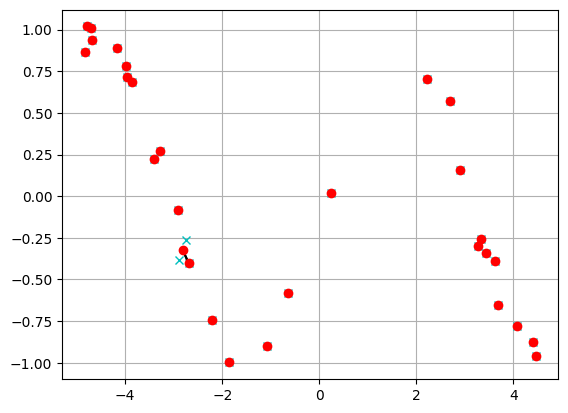

In [6]:
# show SOINN's state
plt.plot(X[:, 0], X[:, 1], 'cx')
nodes = s.nodes
for k in s.adjacent_mat.keys():
    plt.plot(nodes[k, 0], nodes[k, 1], 'k')
plt.plot(nodes[:, 0], nodes[:, 1], 'ro')
plt.grid(True)